# Business Intelligence Analysis of Sales & Profit Data using Python
### by Zoleka Magagula

In [24]:
!pip install openpyxl

In [25]:
import pandas as pd      
import numpy as np        
import matplotlib.pyplot as plt       
import seaborn as sns 
import matplotlib.dates as mdates


## Overview of the Superstore Dataset
This dataset captures detailed information about customer orders and product shipments. Each row represents a unique transaction identified by **Order ID**. It includes key dates like the **Order Date** and **Ship Date**, along with the **Ship Mode** chosen by the customer.

Customer information such as **Customer ID**, **Customer Name**, and demographic details like **Country**, **City**, **Postal Code**, and **Region** are included to understand customer distribution.

Product-related details cover the **Product ID**, **Category**, **Sub-Category**, and **Product Name**. The dataset also tracks **Sales**, **Quantity** ordered, any **Discount** applied, and the **Profit** or loss from each transaction.

This combination of order, customer, product, and financial data allows for comprehensive analysis of sales performance, shipping efficiency, customer segmentation, and profitability.


### Cleaning the Data: 

In [26]:
df = pd.read_excel(r"C:\Users\Zoleka Magagula\Downloads\archive (5)\Corrrect Data.xlsx")
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20


In [27]:
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer',
       'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region',
       'Segment', 'Ship Days', 'Ship Date', 'Ship Mode', 'State',
       'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Profit Ratio', 'Quantity', 'Sales'],
      dtype='object')


In [34]:
df['Sales'].isnull().sum()

np.int64(0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Days          9994 non-null   object        
 12  Ship Date          9994 non-null   datetime64[ns]
 13  Ship Mode          9994 non-null   object        
 14  State   

#### Removing the dollar sign ($) to prevent it from being misinterpreted as a special character

In [28]:
df['Profit'] = df['Profit'].str.replace('$', '', regex= False)

In [29]:
df['Sales'] = df['Sales'].str.replace('$', '', regex= False)
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,4,0.36,3,12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-65,-0.24,3,273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-5,-1.55,2,4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,5,0.25,3,20


#### Converting Data type of Sales Profit from object to float

In [36]:
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

print(df[['Profit', 'Sales']].dtypes)

Profit    float64
Sales     float64
dtype: object


### 🛍️ Sales & Profitability

#### 1. Which product categories generate the highest and lowest total sales?

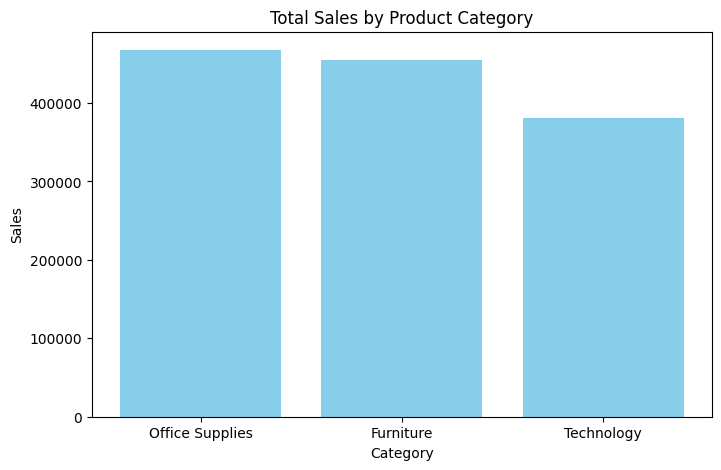

In [37]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

x_ax = category_sales.index
y_ax = category_sales.values

plt.figure(figsize=(8,5))
plt.bar(x_ax, y_ax, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Product Category')

plt.show()

ANSWER: 
1. Office Supplies: Product Category with the Highest Sales.
2. Technology: Product Category with the Lowest Sales.

#### 2. Which Top 5 sub-categories have the highest average profit margins?

In [40]:
df['Profit Margin'] = df['Profit']/df['Sales']*100

In [43]:
avg_margin = df.groupby('Sub-Category')['Profit Margin'].mean().sort_values(ascending=False)
top_5_avg_margin = avg_margin.head(5)

print(f'The Top 5 Sub-Categories are:\n{top_5_avg_margin}')

The Top 5 Sub-Categories are:
Sub-Category
Labels       43.217789
Paper        42.598807
Envelopes    42.356057
Fasteners    30.310911
Copiers      27.709677
Name: Profit Margin, dtype: float64


#### 3. What is the overall profit-to-sales ratio for the business?

In [46]:
ps2_ratio = (df['Profit'].sum() / df['Sales'].sum()) * 100
print(f'The Overall profit-to-sale ratio is: {ps2_ratio:.2f}')

The Overall profit-to-sale ratio is: 18.33


#### 4. Which products are frequently sold at a loss?

In [49]:
loss_sales = df[df['Profit'] < 0 ]

In [54]:
loss_products = loss_sales['Product Name'].value_counts()
top_10_loss_products = loss_products.head(10)
print(f'The products frequently sold at a loss are:\n {top_10_loss_products}')

The products frequently sold at a loss are:
 Product Name
Global Wood Trimmed Manager's Task Chair, Khaki                          12
KI Adjustable-Height Table                                               10
Global High-Back Leather Tilter, Burgundy                                10
Hon 61000 Series Interactive Training Tables                              9
Storex Dura Pro Binders                                                   8
Office Star - Contemporary Task Swivel chair with Loop Arms, Charcoal     8
Global Deluxe Steno Chair                                                 8
Novimex Fabric Task Chair                                                 8
GBC Instant Report Kit                                                    8
Premier Elliptical Ring Binder, Black                                     8
Name: count, dtype: int64


#### 5. Which customers have contributed the most to overall profit?

In [56]:
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending = False)
top_5_cust_profit = customer_profit.head(5)

print("🧾 Top 5 Customers by Total Profit:\n")
for customer, profit in top_5_cust_profit.items():
    print(f"{customer}: ${profit:,.2f}")

🧾 Top 5 Customers by Total Profit:

Brian Moss: $2,198.00
Greg Tran: $2,165.00
Helen Wasserman: $2,163.00
Laura Armstrong: $2,059.00
Clay Ludtke: $1,937.00


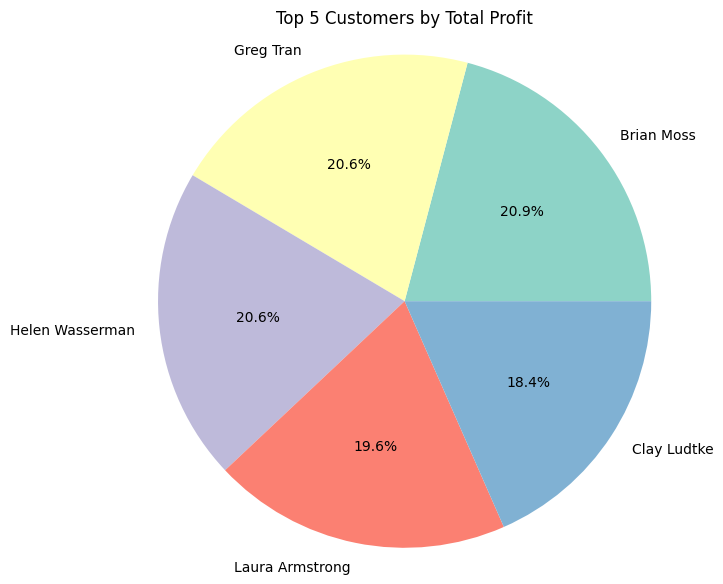

In [58]:
plt.figure(figsize=(7,7))
color = plt.cm.Set3.colors 
plt.pie(
    top_5_cust_profit,
    labels = top_5_cust_profit.index,
    autopct = '%1.1f%%', 
    colors = color)

plt.title('Top 5 Customers by Total Profit')
plt.axis('equal')

plt.show()

### 🌎 Geographical Performance

#### 1. Which states or regions generate the most revenue?

In [118]:
state_revenue = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
region_revenue = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

top_5_state = state_revenue.head(5)
top_2_region = region_revenue.head(2)

print('The Top 5 States by Total Revenue are:\n')
for state, revenue in top_5_state.items():
    print(f"{state}: ${revenue:,.2f}")

print('\nThe Top 2 Regions by Total Revenue are:\n')
for region, revenue in top_2_region.items():
    print(f"{region}: ${revenue:,.2f}")

The Top 5 States by Total Revenue are:

California: $270,615.00
New York: $153,366.00
Texas: $118,835.00
Pennsylvania: $70,256.00
Washington: $64,329.00

The Top 2 Regions by Total Revenue are:

West: $424,173.00
East: $366,492.00


#### 2. Are there any cities consistently generating negative profit?

In [69]:
loss_profit = df[df['Profit'] < 0]
city_loss = loss_profit['City'].value_counts()
top_5_city_loss = city_loss.head(5)

print(f'The top 5 cities consistently generating negative profit are:\n {top_5_city_loss}')

The top 5 cities consistently generating negative profit are:
 City
Philadelphia    247
Houston         182
Chicago         153
Dallas           72
Columbus         51
Name: count, dtype: int64


#### 3. How does sales and profit vary across different manufacturers?

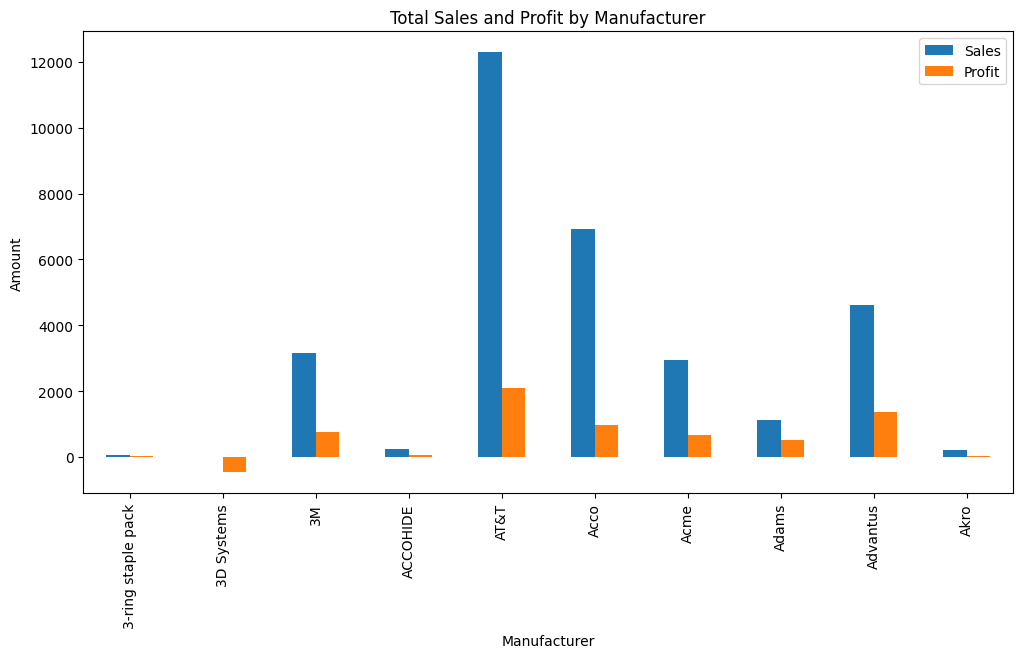

In [71]:
sales_manufact = df.groupby('Manufacturer')['Sales'].sum().sort_values(ascending=False)
profit_manufact = df.groupby('Manufacturer')['Profit'].sum().sort_values(ascending=False)

df_manufact =  pd.DataFrame({
    'Sales': sales_manufact,
    'Profit': profit_manufact
}).fillna(0)

top_n = 10
df_top = df_manufact.head(top_n)

ax = df_top.plot(kind='bar', figsize=(12,6))

ax.set_xlabel('Manufacturer')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Manufacturer')

plt.show()

#### 4. Which cities have the highest average order quantity?

In [72]:
city_quant = df.groupby('City')['Quantity'].mean().sort_values(ascending=False)

top_10_city_quant = city_quant.head(10)
print(f'The Top 10 cities with highest average order quantity:\n {top_10_city_quant}')

The Top 10 cities with highest average order quantity:
 City
Vacaville      11.0
Conroe          9.0
Rogers          9.0
Bartlett        8.0
Bellingham      8.0
Marysville      7.5
Santa Fe        7.0
Linden          7.0
Palatine        7.0
Tinley Park     7.0
Name: Quantity, dtype: float64


### 🕐 Time & Trends

#### 1. How do sales vary by day of the week?

In [119]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

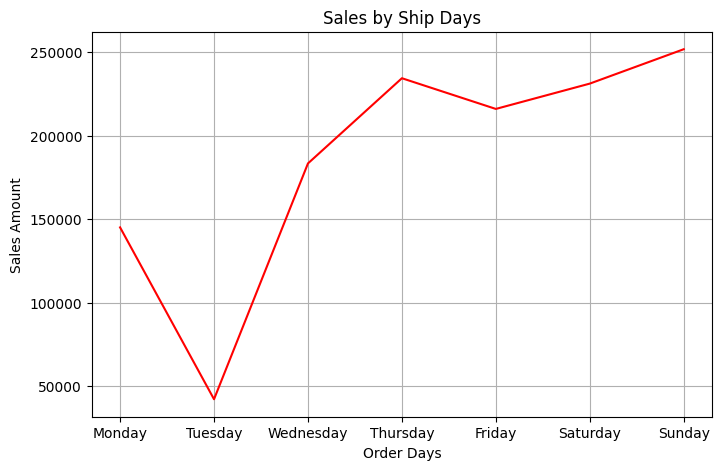

In [120]:
df['Order Day'] = df['Order Date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Order Day'] = pd.Categorical(df['Order Day'], categories=weekday_order, ordered=True)

sales_by_day = df.groupby('Order Day', observed=False)['Sales'].sum().sort_index(ascending= True)

plt.figure(figsize=(8,5))
plt.plot(sales_by_day.index, sales_by_day.values, color='red')
plt.xlabel('Order Days')
plt.ylabel('Sales Amount')
plt.title('Sales by Ship Days')
plt.grid(True)
plt.show()

#### 2. Which months have the highest average sales?

In [82]:
df['Ship Month'] = df['Ship Date'].dt.strftime('%B')

monthly_avg_sales = df.groupby('Ship Month')['Sales'].mean().sort_values(ascending=False)
top_5_months = monthly_avg_sales.head(5)

print(f'The months with the highest average sales:\n {top_5_months}')

The months with the highest average sales:
 Ship Month
December    145.865269
July        144.545845
August      142.712716
March       142.526917
November    141.326455
Name: Sales, dtype: float64


#### 3. Are there seasonal patterns in shipping times?

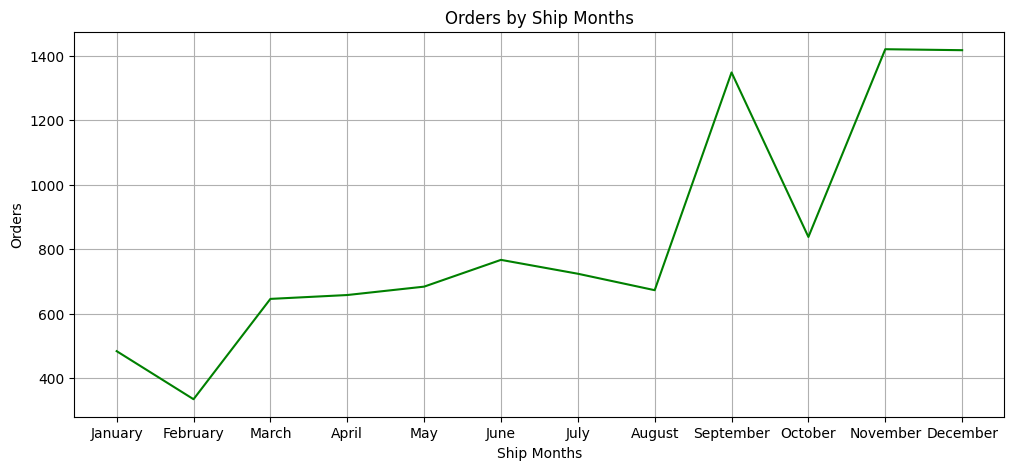

In [123]:
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Ship Month'] = pd.Categorical(df['Ship Date'].dt.strftime('%B'),  categories=monthly_order, ordered=True)

monthly_order_counts = df.groupby('Ship Month', observed = False)['Order ID'].count()

x_ax = monthly_order_counts.index
y_ax = monthly_order_counts.values

plt.figure(figsize=(12,5))
plt.plot(x_ax, y_ax, color='green')
plt.xlabel('Ship Months')
plt.ylabel('Orders')
plt.title('Orders by Ship Months')
plt.grid(True)
plt.show()

#### 4. Has the average profit ratio improved or declined over time?

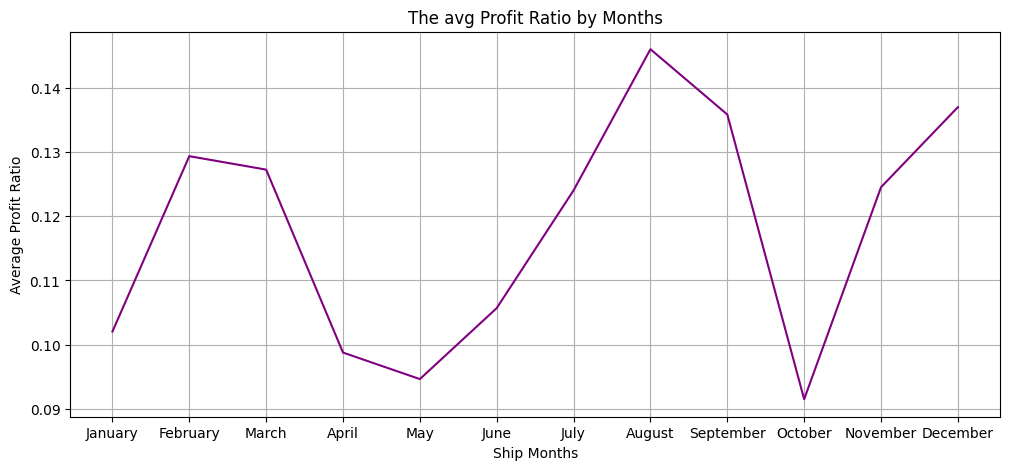

In [106]:
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Ship Month'] = pd.Categorical(df['Ship Date'].dt.strftime('%B'),  categories=monthly_order, ordered=True)

avg_profit_ratio = df.groupby('Ship Month', observed = False)['Profit Ratio'].mean()

x_ax = avg_profit_ratio.index
y_ax = avg_profit_ratio.values

plt.figure(figsize=(12,5))
plt.plot(x_ax, y_ax, color='purple')
plt.xlabel('Ship Months')
plt.ylabel('Average Profit Ratio')
plt.title('The avg Profit Ratio by Months')
plt.grid(True)
plt.show()

#### 5. What is the trend in discount usage over time?

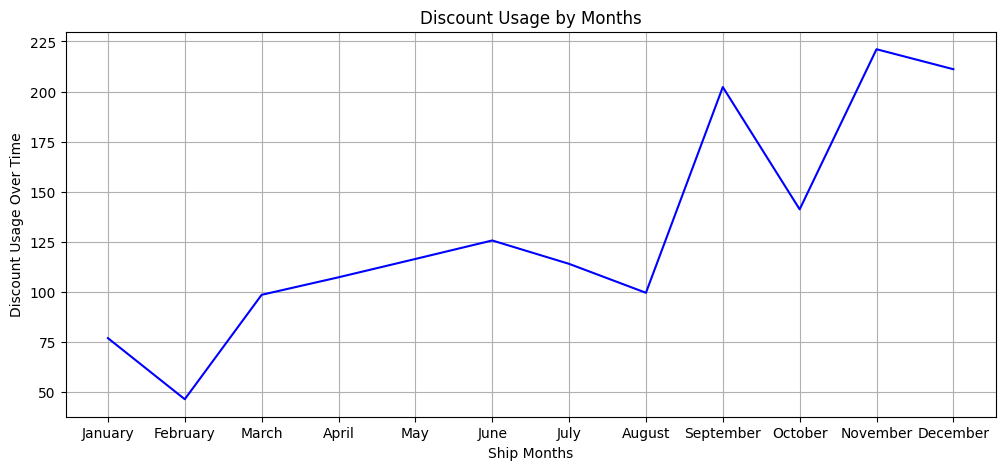

In [105]:
disc_usage = df.groupby('Ship Month', observed=False)['Discount'].sum()

x_ax =disc_usage.index
y_ax = disc_usage.values

plt.figure(figsize=(12,5))
plt.plot(x_ax, y_ax, color='blue')
plt.xlabel('Ship Months')
plt.ylabel('Discount Usage Over Time')
plt.title('Discount Usage by Months')
plt.grid(True)
plt.show()

### 🚚 Shipping & Logistics

#### 1. Which shipping mode has the fastest shipping time?

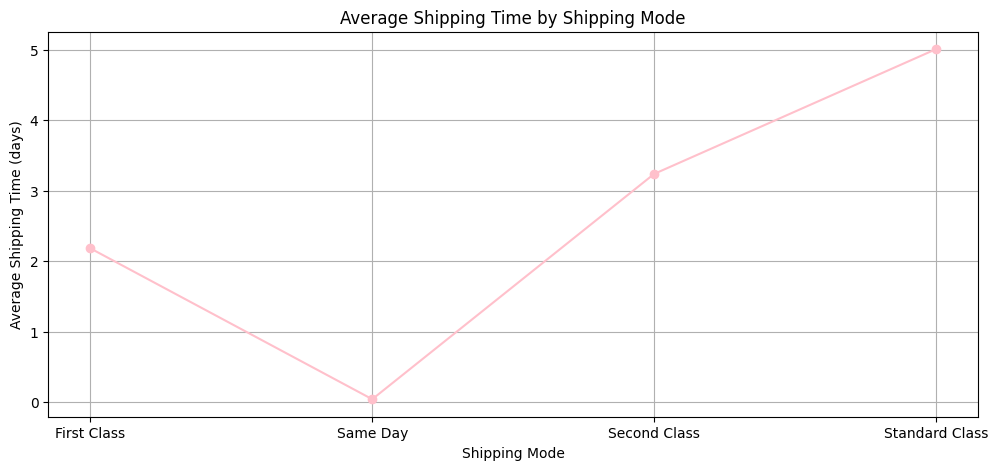

In [104]:
# 1. Calculate shipping time in days
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# 2. Group by Ship Mode and calculate average shipping time
avg_shipping_time = df.groupby('Ship Mode', observed=False)['Shipping Time'].mean()

# 3. Prepare the x and y axes
x_ax = avg_shipping_time.index
y_ax = avg_shipping_time.values

# 4. Plot
plt.figure(figsize=(12, 5))
plt.plot(x_ax, y_ax, color='pink', marker='o')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Time (days)')
plt.title('Average Shipping Time by Shipping Mode')
plt.grid(True)
plt.show()

#### 2. Does shipping mode impact overall profitability?

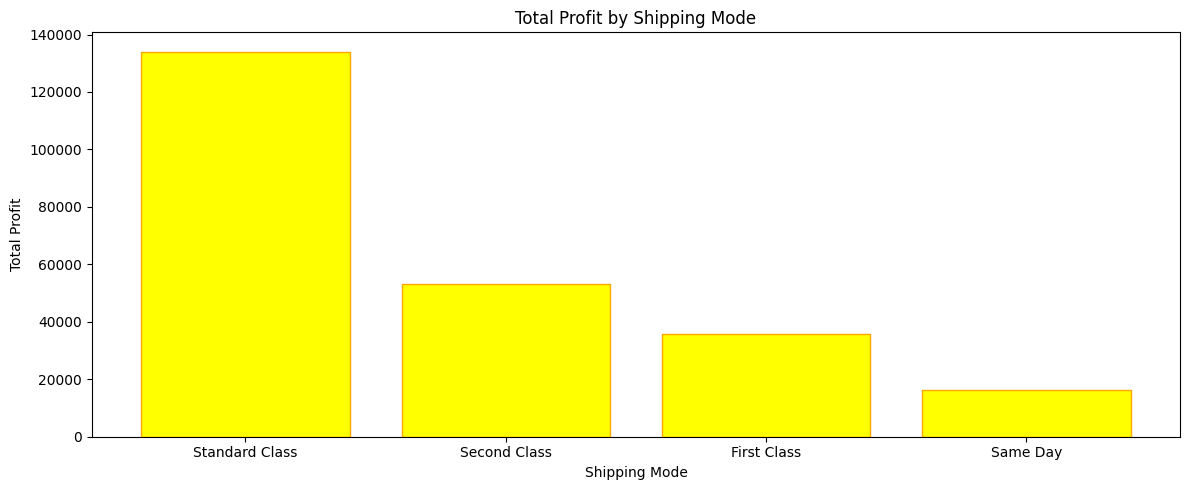

In [109]:
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)

x_ax = ship_mode_profit.index
y_ax = ship_mode_profit.values


plt.figure(figsize=(12,5))
plt.bar(x_ax, y_ax, color='yellow', edgecolor='orange')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.title('Total Profit by Shipping Mode')
plt.tight_layout()
plt.show()

### 📦 Discounts, Promotions & Customers

#### 1. Do higher discounts improve total profit?

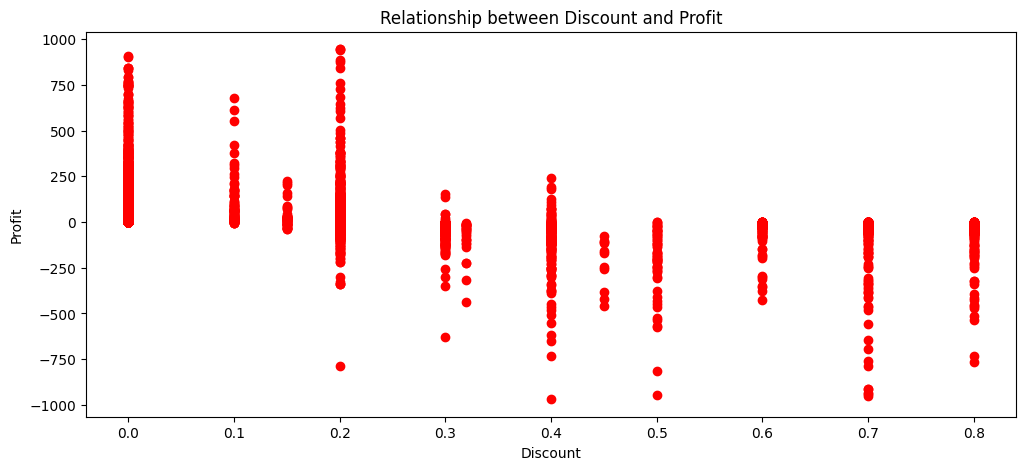

In [111]:
x_ax = df['Discount']
y_ax = df['Profit']

plt.figure(figsize=(12,5))
plt.scatter(x_ax, y_ax, color='red') 
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relationship between Discount and Profit')

plt.show()

#### 2. What is the average discount applied by product category and sub-category?


In [114]:
avg_prod_disc = df.groupby('Category')['Discount'].mean().sort_values(ascending=False)
mean_apd = avg_prod_disc.mean()

avg_subprod_disc = df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
mean_aspd = avg_subprod_disc.mean() 

print('Overall Average Discount across Product Categories:', round(mean_apd, 2))
print('Overall Average Discount across Product Sub-Categories:', round(mean_aspd, 2))


Overall Average Discount across Product Categories: 0.15
Overall Average Discount across Product Sub-Categories: 0.15


#### 3. Who are the Top 5 Customers generating the most Sales?

In [117]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_5_customers = top_customers.head(5)

print(f'The Top 5 Customers generating the most Sales:\n {top_5_customers}')

The Top 5 Customers generating the most Sales:
 Customer Name
Dan Reichenbach      6527.0
William Brown        6159.0
Cassandra Brandow    6076.0
Brian Moss           5660.0
Emily Phan           5481.0
Name: Sales, dtype: float64


### My Insights

#### Superstore Data Analysis Summary 

Following a comprehensive analysis of the Superstore dataset, we identified several key insights regarding product performance, customer behavior, and regional trends:

**Top-Performing Category**:
  Office Supplies is the highest revenue-generating category, particularly driven by sub-categories such as Paper, Labels, Envelopes, and Fasteners.
**Profitability Overview**:
  The overall profit-to-sales ratio stands at 18.33%, which is notably strong compared to industry benchmarks.
**Loss-Making Products**:
  Specific products consistently sold at a loss include:
  Global Wood Trimmed Manager’s Task Chair
  KI Adjustable-Height Chair
  Global High-Back Leather Tilter (Burgundy)
Recommendation: To mitigate losses, the business could consider sourcing from more cost-effective manufacturers or removing discount options for these products.
**Top Revenue-Generating Locations**:
  States: California, New York, Texas, and Washington
  Regions: Western and Eastern U.S.
**Cities with Negative Profit Margins**:
  Houston, Philadelphia, Chicago, and Columbus consistently report losses, indicating a need for deeper local market evaluation.

#### Sales and Shipping Trends
**Weekly Patterns**:
  Orders peak from Thursday through the weekend, making Monday the busiest shipping day. This suggests a strong correlation between end-of-week purchases and early-week deliveries.
**Seasonal Insights**:
  While no clear seasonal trend dominates, Autumn and Winter months generally show higher sales performance compared to Spring and Summer.
**Shipping Preferences**:
  * Standard Class is the most frequently used and most profitable shipping method.
  * Same-Day Delivery contributes less than \$20,000 in profit, implying that many customers are outside same-day service zones.

#### Discounts and Profitability

The data reveals that higher discounts often correlate with lower profits, as illustrated in the scatter plot analysis. However, strategic discounting remains important for customer retention and loyalty. A balanced discount strategy is recommended—targeting key segments without compromising profitability.
